# Churn Modelling

### This dataset is taken from https://www.kaggle.com/shrutimechlearn/churn-modelling

### This dataset contains the details of bank's customers and target variable ( whether the customer left the bank or not )

In [1]:
# Set the working path
import os
os.chdir('D:\\2_p\\p\\Studies\\DS\\Projects\\DL\\ChurnModelling')

## Preprocessing the Data

In [2]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# let us load the dataset & explore the features
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
# Create the X variables ( predictors ) & y ( target variable )
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [6]:
# we have two categorical variables, let us create the dummies for them
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
# Concatenate these dummies to data frame
X=pd.concat([X,geography,gender],axis=1)

# and drop these columns
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
# Create Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [10]:
# Apply the Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create the ANN

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [12]:
# Initialising the ANN
classifier = Sequential()

In [13]:
# Add the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Add the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [15]:
# Add the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [16]:
# Compile the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Train on 5024 samples, validate on 2476 samples
Epoch 1/100
5024/5024 [==============================] - 1s 114us/step - loss: 0.7289 - accuracy: 0.6636 - val_loss: 0.5027 - val_accuracy: 0.7904
Epoch 2/100
5024/5024 [==============================] - 0s 82us/step - loss: 0.4756 - accuracy: 0.7976 - val_loss: 0.4594 - val_accuracy: 0.8069
Epoch 3/100
5024/5024 [==============================] - 0s 83us/step - loss: 0.4473 - accuracy: 0.8101 - val_loss: 0.4409 - val_accuracy: 0.8130
Epoch 4/100
5024/5024 [==============================] - 0s 83us/step - loss: 0.4345 - accuracy: 0.8165 - val_loss: 0.4329 - val_accuracy: 0.8187
Epoch 5/100
5024/5024 [==============================] - 0s 83us/step - loss: 0.4283 - accuracy: 0.8213 - val_loss: 0.4280 - val_accuracy: 0.8195
Epoch 6/100
5024/5024 [==============================] - 0s 83us/step - loss: 0.4252 - accuracy: 0.8207 - val_loss: 0.4253 - val_accuracy: 0.8215
Epoch 7/100
5024/5024 [====

In [18]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


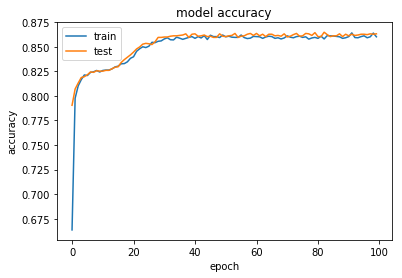

In [19]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making the predictions and evaluating the model

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1900   90]
 [ 274  236]]


In [22]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8544
